## Observations and Insights 

In [37]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset and display the data table for preview
combined_mousestudy_df = pd.merge(mouse_metadata, study_results,
                                 how='left', on='Mouse ID')

# sorting by mouse id and remove values that are duplicated
combined_mousestudy_df.sort_values(["Mouse ID", "Timepoint"], inplace = True) 

combined_mousestudy_df.loc[combined_mousestudy_df.duplicated(subset = ["Mouse ID", "Timepoint"]), "Mouse ID"]

combined_mousestudy_df = combined_mousestudy_df.loc[combined_mousestudy_df["Mouse ID"] != "g989", :]

combined_mousestudy_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
454,a203,Infubinol,Female,20,23,0,45.000000,0
455,a203,Infubinol,Female,20,23,5,48.508468,0
456,a203,Infubinol,Female,20,23,10,51.852437,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
458,a203,Infubinol,Female,20,23,20,55.173336,1


## Summary Statistics

In [38]:
# Summary statistics table 
# mean, median, variance, standard deviation, and SEM (standard error of the mean) of the tumor volume for each regimen


tumor_volume_avg = combined_mousestudy_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"].rename("Mean")
tumor_volume_median = combined_mousestudy_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"].rename("Median")
tumor_volume_variance = combined_mousestudy_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"].rename("Variance")
tumor_volume_standev = combined_mousestudy_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"].rename("Standard Deviation")
tumor_volume_sem = combined_mousestudy_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"].rename("Standard Error of Mean")

Summary_tumor_volume = pd.DataFrame({'Avg Tumor Vol': tumor_volume_avg, 'Mediam Tumor Vol': tumor_volume_median, 
                                     'Tumor Vol Variance': tumor_volume_variance, 'Tumor Vol Standard Deviation': tumor_volume_standev, 
                                     'Tumor Vol Standard Error of Mean': tumor_volume_sem})

Summary_tumor_volume.head()

,Avg Tumor Vol,Mediam Tumor Vol,Tumor Vol Variance,Tumor Vol Standard Deviation,Tumor Vol Standard Error of Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice')

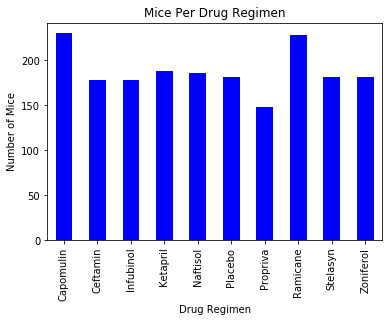

In [39]:
# Grouping mice by drug regimen 
mice_by_treatment = combined_mousestudy_df.groupby("Drug Regimen")

# Count how many number of mice in each regimen
count_mice_by_treatment = mice_by_treatment["Drug Regimen"].count()

# Bar plot displaying number of mice per drug regimen by pandas method

count_chart = count_mice_by_treatment.plot(kind='bar', color="b")

# Set the xlabel and ylabel 
plt.title("Mice Per Drug Regimen")
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("Number of Mice")

<BarContainer object of 10 artists>

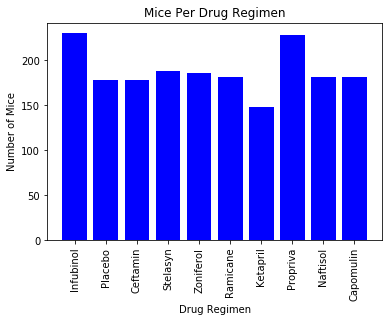

In [40]:
#IS THERE A WAY TO GET IT ALPHABETICAL????????

# Bar plot displaying number of mice per drug regimen by pyplot method

drug_regimen = combined_mousestudy_df["Drug Regimen"].unique()
mice_in_treatments = count_mice_by_treatment
x_axis = np.arange(len(mice_in_treatments))

plt.title("Mice Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

tick_locations = [drug for drug in x_axis]
plt.xticks(tick_locations, drug_regimen)
plt.xticks(rotation=90)

plt.bar(x_axis, mice_in_treatments, color="b", align="center")


Text(0, 0.5, '')

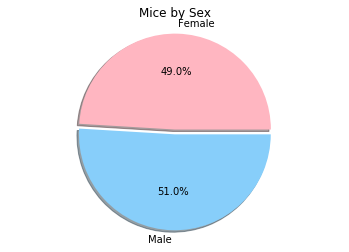

In [41]:
# Grouping mice by drug regimen 
mice_by_sex = combined_mousestudy_df.groupby("Sex")

# Count how many number of mice in each regimen
count_mice_by_sex = mice_by_sex["Sex"].count()

# pie chart displaying the distribution of female versus male mice using pandas
colors = ["lightpink", "lightskyblue"]
explode = (0, 0.05)
mice_by_sex_chart = count_mice_by_sex.plot(kind='pie', autopct="%1.1f%%", shadow=True, startangle=0, colors=colors , explode=explode) 
plt.title("Mice by Sex")
plt.axis("equal")
plt.ylabel(None)


(-1.108129183272889, 1.1003871039653756, -1.1565962693631673, 1.11041028884618)

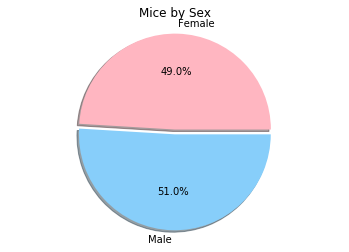

In [42]:
# pie chart displaying the distribution of female versus male mice using pyplot

sex = combined_mousestudy_df["Sex"].unique()
percent_sex = count_mice_by_sex
colors = ["lightpink", "lightskyblue"]
explode = (0, 0.05)

plt.pie(percent_sex, explode=explode, labels=sex, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=0)

plt.title("Mice by Sex")
plt.axis("equal")

## Quartiles, Outliers and Boxplots

Text(0.5, 0, 'Drug Regimen')

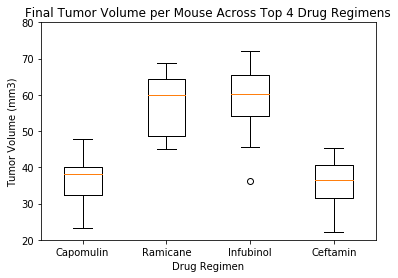

In [43]:
# Grab the top 4 regimens (Capomulin, Ramicane, Infubinol, and Ceftamin)

combined_df = combined_mousestudy_df
drug_list =['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

top_reg = combined_df[combined_df["Drug Regimen"].isin(drug_list)]
top_reg = top_reg.sort_values(["Timepoint"])
top_reg

top_reg_dat = top_reg[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
top_reg_dat

#Group the data by both Drug Regimen and Mouse ID and get the final tumor measurement
top_reg_sort = top_reg_dat.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
top_reg_sort.head()

# put above data into dataframe for future manipulation
top_reg_df = top_reg_sort.to_frame()
top_reg_df

#reset the index for final 4 drugs of interest
tumor_drugs_df = top_reg_df.reset_index()

# Create a tumor drug regimen list with tumor volume for plotting
final_drug_list = tumor_drugs_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
final_drug_list

#Turn the list into a dataframe for manipulation
final_drugs_df = pd.DataFrame(final_drug_list)

# Generate a box plot of the final tumor volume of each mouse across the top four drug regimens
tumor_volumes = [volume for volume in final_drugs_df['Tumor Volume (mm3)']]
plt.boxplot(tumor_volumes, labels=drug_list)
plt.ylim(20, 80)
plt.title("Final Tumor Volume per Mouse Across Top 4 Drug Regimens")
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')


## Line and Scatter Plots

In [44]:
# Randomly selected a mouse and grab data for that particular mouse, the mouse chosen: m601

time_point_vs_tumor_vol = combined_df[combined_df["Mouse ID"].isin(["m601"])]
time_point_vs_tumor_vol

#Create new data frame for mouse ID m601 with ID, timepoint and tumor volume

time_point_vs_tumor_vol_df = time_point_vs_tumor_vol[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
time_point_vs_tumor_vol_df

# Establish line plot data frame, resetting the index
line_plot = time_point_vs_tumor_vol_df.reset_index()
line_plot

,index,Mouse ID,Timepoint,Tumor Volume (mm3)
0,30,m601,0,45.000000
1,31,m601,5,41.408591
2,32,m601,10,36.825367
3,33,m601,15,35.464612
4,34,m601,20,34.255732
5,35,m601,25,33.118756
6,36,m601,30,31.758275
7,37,m601,35,30.834357
8,38,m601,40,31.378045
9,39,m601,45,28.430964


Text(0, 0.5, 'Tumor Volume (mm3)')

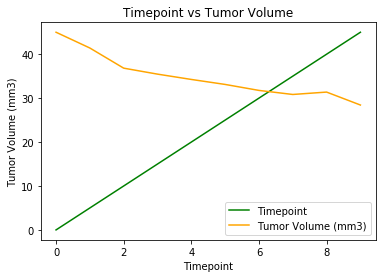

In [68]:
# Remove index for graphing of the line plot with final dataframe
final_line_plot = line_plot[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
final_line_plot

# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
color = ["green", "orange"]
lines_df = final_line_plot.plot.line(color = color)
plt.title("Timepoint vs Tumor Volume")
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')


Text(0, 0.5, 'Average Tumor Volume (mm3)')

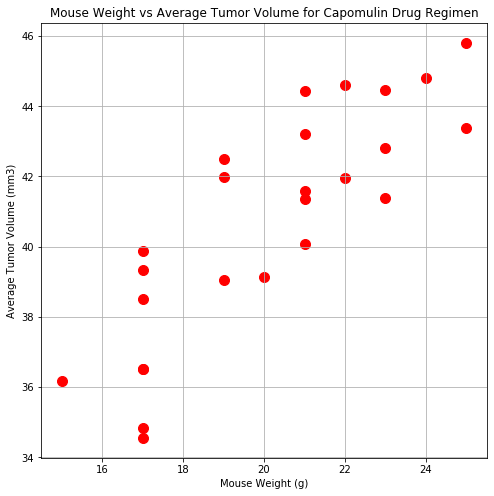

In [46]:
# Create a dataframe to retrieve data for the specific drug regimen 'Capomulin'
Capomulin_df = combined_df[combined_df["Drug Regimen"].isin(["Capomulin"])]
Capomulin_df

Capomulin_Scatter_plot = Capomulin_df.reset_index()
Capomulin_Scatter_plot

Capomulin_weight = Capomulin_Scatter_plot.groupby(['Mouse ID', 'Weight (g)', 'Tumor Volume (mm3)']).mean()
Capomulin_weight

Capomulin_weight_volume_plot = pd.DataFrame(Capomulin_weight).reset_index()
Capomulin_weight_volume_plot

# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Capomulin_scatter_final = Capomulin_weight_volume_plot.groupby('Mouse ID').mean()
Capomulin_scatter_final

Capomulin_scatter_final.plot(kind='scatter', x='Weight (g)', 
             y='Tumor Volume (mm3)', grid = True, figsize= (8,8), c='red', s=100)

plt.title("Mouse Weight vs Average Tumor Volume for Capomulin Drug Regimen")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')


In [47]:
#LEARN HOW TO DO THE ABOVE WITH PYPLOT METHOD!


## Correlation and Regression

The r-squared is: 0.708856804770873
y = 0.95x + 21.55


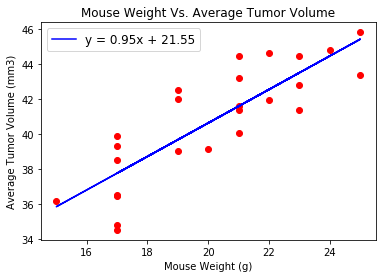

In [63]:
# Add the linear regression equation and line to plot
x_values = Capomulin_scatter_final["Weight (g)"]
y_values = Capomulin_scatter_final["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values, color = 'red')
plt.plot(x_values,regress_values,"r-",color = "blue", label = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)))
plt.legend(loc="upper left", fontsize=12)
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title("Mouse Weight Vs. Average Tumor Volume")
print(f"The r-squared is: {rvalue**2}")
print(line_eq)
plt.show()
